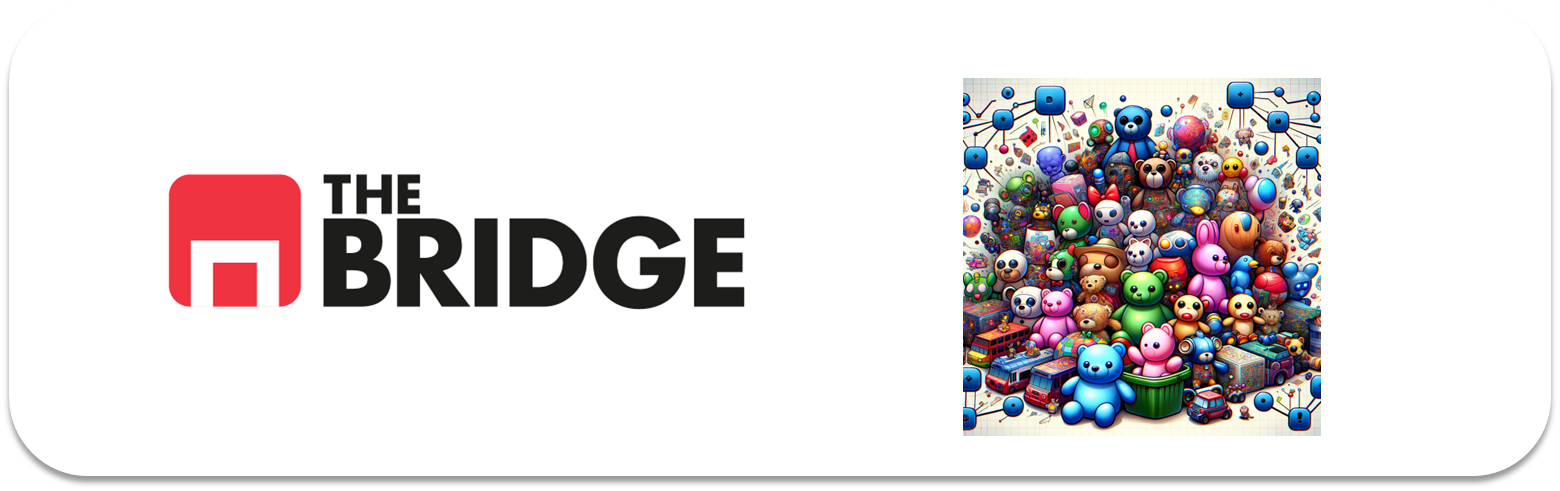

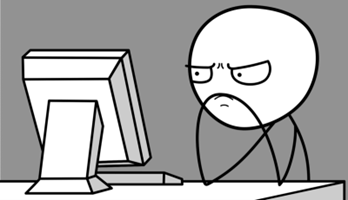

Para ejercitarte y afianzar lo aprendido sobre **K-Means**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import matplotlib as mpl
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
import funciones_ML as bt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter



### Entendiendo el problema de negocio

En este notebook vamos a hacer un análisis de datos tirando de clusterizaciones para evaluar si existen grupos en nuestros productos, en este caso medicamentos, y posteriormente poder etiquetarlos. Poseemos información como rating, efectividad, efectos secundarios, entre otros.

### Ejercicio 1

Importa los datos, "./data/drugLibTrain_raw.tsv", que contiene un dataset con diferentes fármacos, sus efectos y ratings de los clientes de dichos fármacos. Realiza una inspección preliminar y quita las columnas que consideres innecesarias.

In [3]:

df_med=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_15_NO_SUPERVISADOS_CLUSTERING\UNIT_1\EJERCICIOS\data\drugLibTrain_raw.tsv", sep="\t")

In [4]:
df_med

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Ejercicio 2: MiniEDA

Como es un problema no supervisado (vamos a intentar agrupar los medicamentos sin tener una referencia o target inicial), no hay split, vamos directos al miniEDA. Analiza qué variables son descartables en función de su porcentaje de cardinalidad. Es decir obten la cardinalidad y su porcentaje para cada posible feature y crea un dataset nuevo descartando las features que creas conveniente. NOTA: Como simplificación, descarta la columna con url.

In [5]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Unnamed: 0,100.0,int64,2080.61,No,1188.0,1411341.21,1062.5,2092.0,3092.5,numerica continua,0.0
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.03
benefitsReview,97.55,object,No,none,No,No,No,No,No,categorica ordinal,0.58
sideEffectsReview,90.54,object,No,none,No,No,No,No,No,categorica ordinal,2.41
commentsReview,98.04,object,No,none,No,No,No,No,No,categorica ordinal,0.39


Las que tienen una cardinalidad muy alta, son: 'benefitsReview', 'sideEffectsReview', 'commentsReview', ademas de ser las que mayor numero de NaNs tienen, por lo qque las eliminamos, junto con 'Unnamed: 0'

In [6]:
df_med.drop(columns={"Unnamed: 0",'benefitsReview', 'sideEffectsReview', 'commentsReview'}, inplace=True)

In [7]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.03


debido a que representa un minima proporcion 0.03% de los datos, le imputo la moda


In [8]:
df_med.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition'], dtype='object')

In [9]:
df_med["condition"].fillna("depression", inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_5820\3248030877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_med["condition"].fillna("depression", inplace=True)


In [10]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.0


In [11]:
col_cat=['urlDrugName', 'effectiveness', 'sideEffects', 'condition']

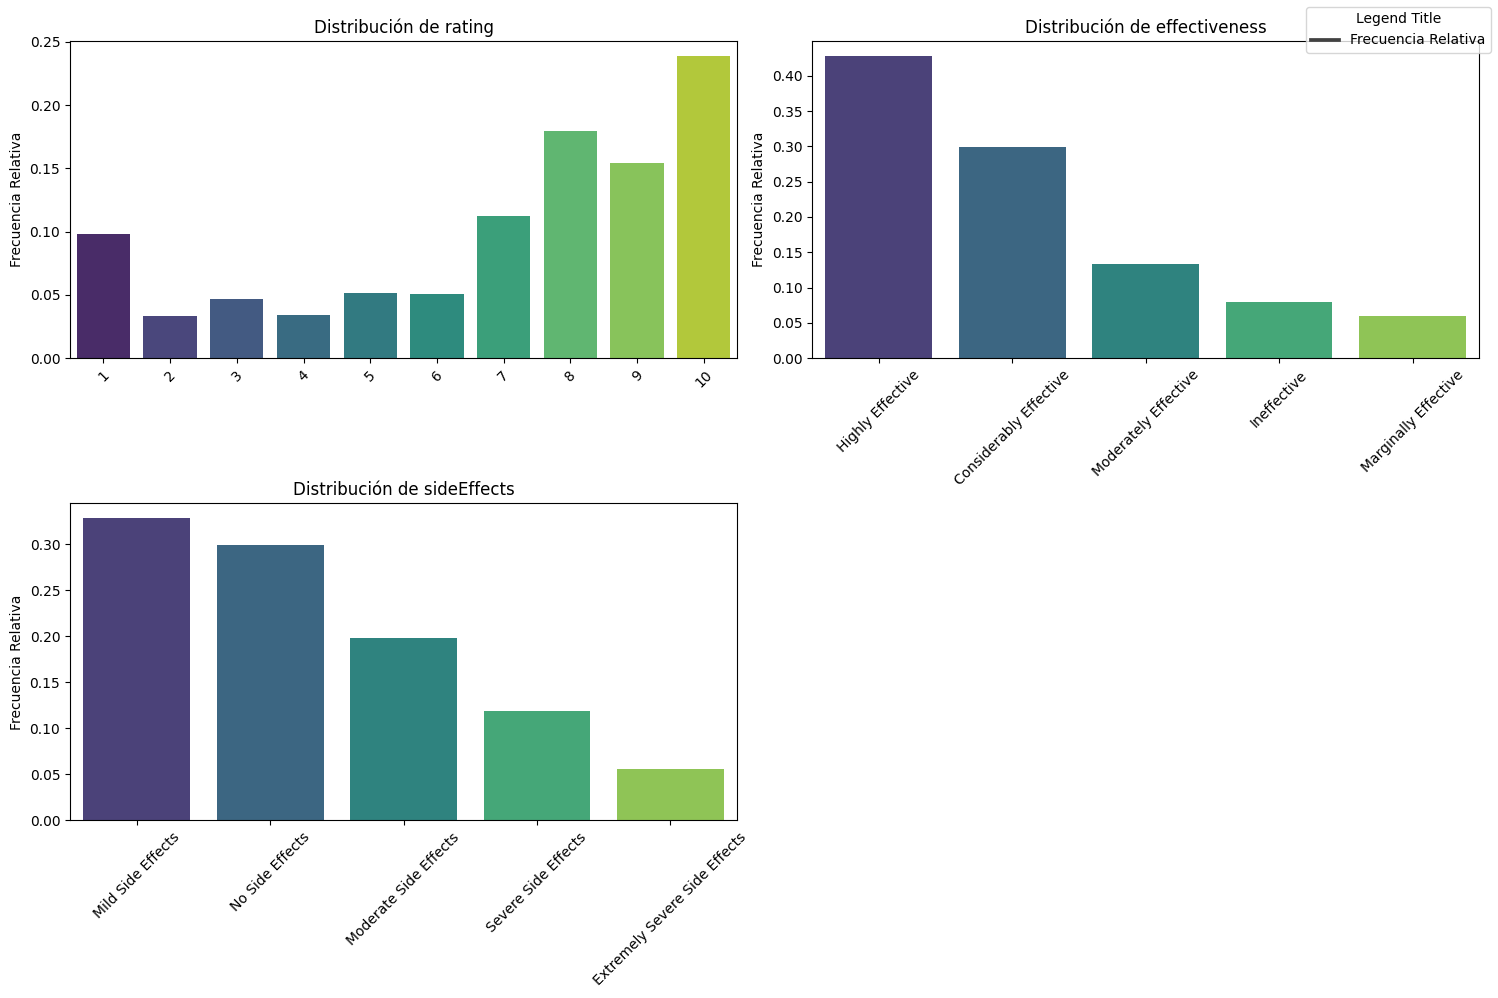

In [12]:
bt.pinta_distribucion_categoricas(df_med, columnas_categoricas=['rating', 'effectiveness', 'sideEffects'], relativa=True, mostrar_valores=False);

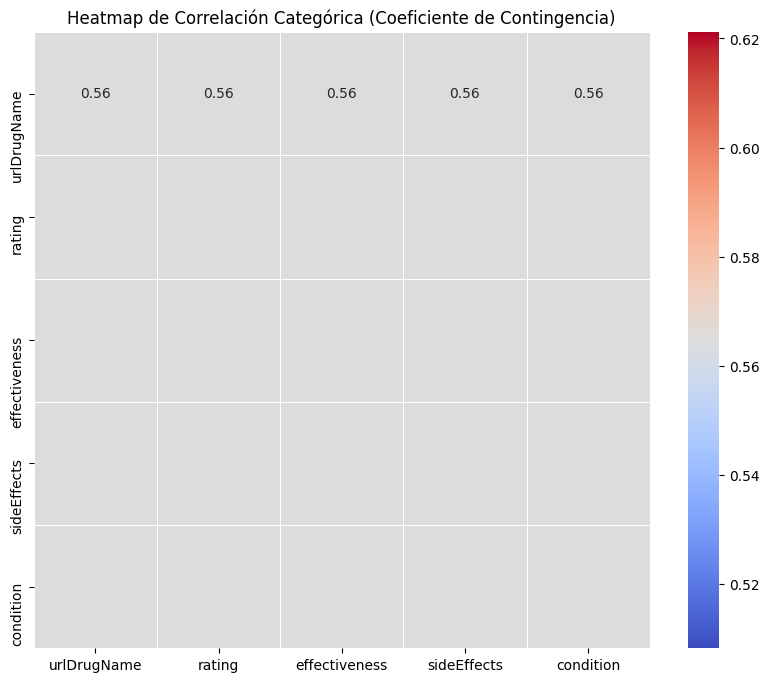

0.5646733092197959

In [13]:

bt.categorical_correlation_heatmap(df_med)

el coeficiente de contingencia entre las variables categoricas estan por enciam de 0.56, por lo que son ligeramente depedientes unos de las otras

### Ejercicio 3

Construye un train set (llámalo X) sólo con las features que hayas seleccionado del ejercicio anterior (es decir las que no hayas descartado como posibles features) 

In [14]:
X= df_med
X

,urlDrugName,rating,effectiveness,sideEffects,condition
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia
...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd
3103,zoloft,1,Ineffective,Extremely Severe Side Effects,depression
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy
3105,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy


In [15]:
X.urlDrugName.unique()

array(['enalapril', 'ortho-tri-cyclen', 'ponstel', 'prilosec', 'lyrica',
       'propecia', 'vyvanse', 'elavil', 'xanax', 'claritin', 'flagyl',
       'dextroamphetamine', 'sarafem', 'latisse', 'aldara', 'effexor-xr',
       'neurontin', 'omnicef', 'klonopin', 'dovonex', 'protopic',
       'effexor', 'sotret', 'retin-a-micro', 'lamotrigine', 'rebif',
       'symbicort', 'lamictal', 'doxycycline', 'actonel', 'provigil',
       'ambien', 'wellbutrin', 'nortriptyline', 'imitrex', 'ativan',
       'prozac', 'topamax', 'levitra', 'oxycodone', 'oxycontin',
       'vicodin', 'accutane', 'zocor', 'minocycline', 'estrace',
       'meridia', 'prevacid', 'cosopt', 'renova', 'depakote', 'tekturna',
       'zegerid', 'sular', 'crestor', 'metformin', 'celexa', 'lexapro',
       'naproxen', 'levoxyl', 'synthroid', 'spironolactone', 'oracea',
       'paxil', 'zantac', 'fosamax', 'tirosint', 'cymbalta', 'ambien-cr',
       'angeliq', 'prempro', 'wellbutrin-xl', 'biaxin', 'lipitor',
       'tazorac', 'a

In [16]:
X.condition.unique()

array(['management of congestive heart failure', 'birth prevention',
       'menstrual cramps', ...,
       'hives, itching, swelling due to allergies',
       'muscle relaxant - spinal disorder', 'total hysterctomy'],
      dtype=object)

In [17]:
X.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [18]:
X.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

Debido a la cantidad de valores unicos para convertir en numerica, lo que haria mas complejo el proceso, quito la columna urlDrugName

### Ejercicio 4 

Trasforma las features que consideres necesario (categóricas y numéricas) y luego aplica el escalado que consideres necesario.

In [19]:
#cambiamos a nuemaricas con apply
bt.convertir_object_a_numeros(X)

,urlDrugName,rating,effectiveness,sideEffects,condition
0,0,4,0,0,0
1,1,1,0,1,1
2,2,10,0,2,2
3,3,3,1,0,3
4,4,2,1,1,4
...,...,...,...,...,...
3102,6,10,0,0,27
3103,95,1,2,3,7
3104,185,2,1,4,1425
3105,501,8,3,0,116


In [20]:
# aplñico min max scaler para no tener un numero muy alto de columnas y subir la dimensionalidad que pàsaria con one hot enconder
mM = MinMaxScaler()
X[X.columns] = mM.fit_transform(X)

In [21]:
X

,urlDrugName,rating,effectiveness,sideEffects,condition
0,0.000000,0.333333,0.00,0.00,0.000000
1,0.001996,0.000000,0.00,0.25,0.000702
2,0.003992,1.000000,0.00,0.50,0.001404
3,0.005988,0.222222,0.25,0.00,0.002105
4,0.007984,0.111111,0.25,0.25,0.002807
...,...,...,...,...,...
3102,0.011976,1.000000,0.00,0.00,0.018947
3103,0.189621,0.000000,0.50,0.75,0.004912
3104,0.369261,0.111111,0.25,1.00,1.000000
3105,1.000000,0.777778,0.75,0.00,0.081404


### Ejercicio 5: Otención de K, aproximación visual

Analiza la relación entre features (con scatter plots) una vez transformadas para comprobar si existe visualmente algún indicio del número de clústeres que podríamos estar buscando. Por otro lado este análisis nos puede hacer descartar alguna feature o generar una nueva

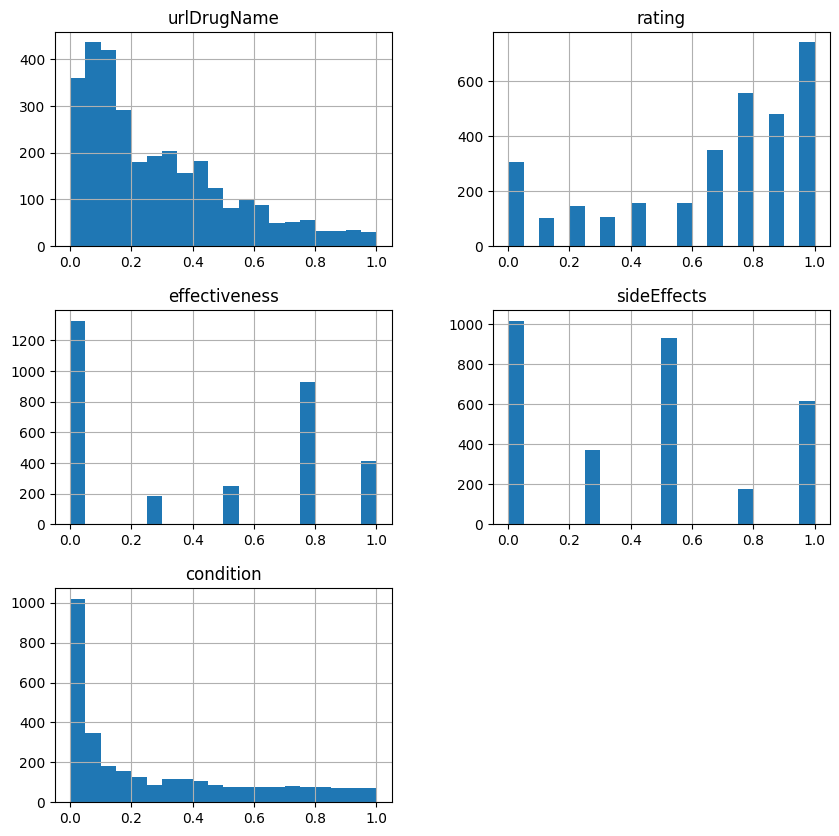

In [22]:
X.hist(figsize=(10,10), bins=20);

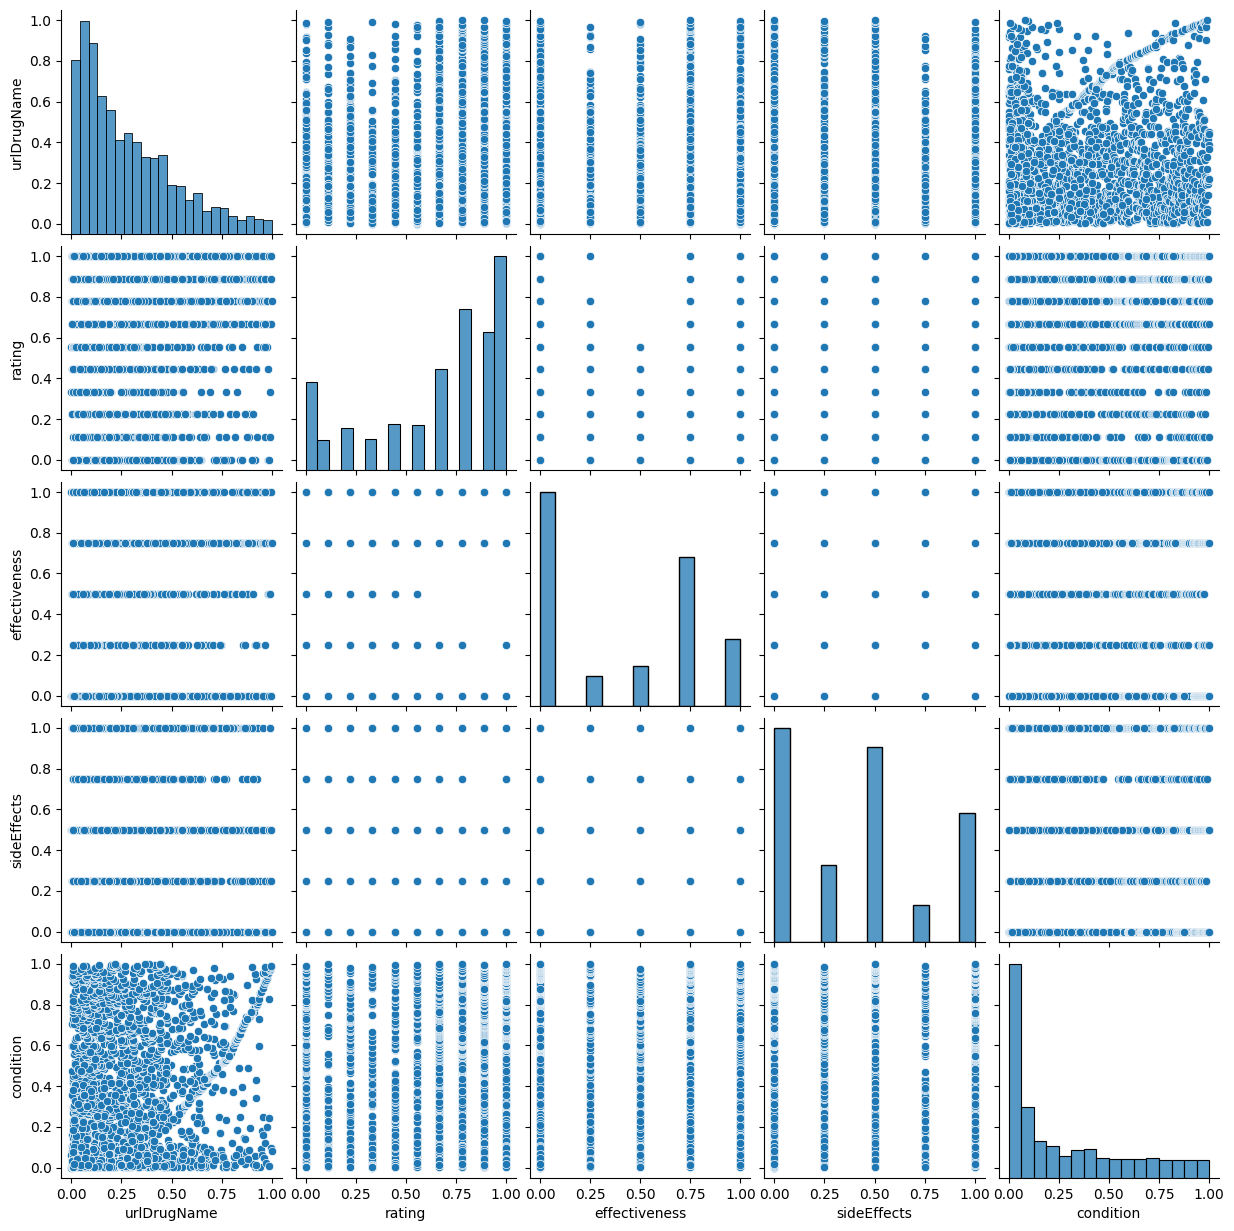

In [23]:
sns.pairplot(X);

### Ejercicio 6: Obtención de K, método del codo

Evalua diferentes valores K y escoge uno a partir del método del codo/elbow de inercia.

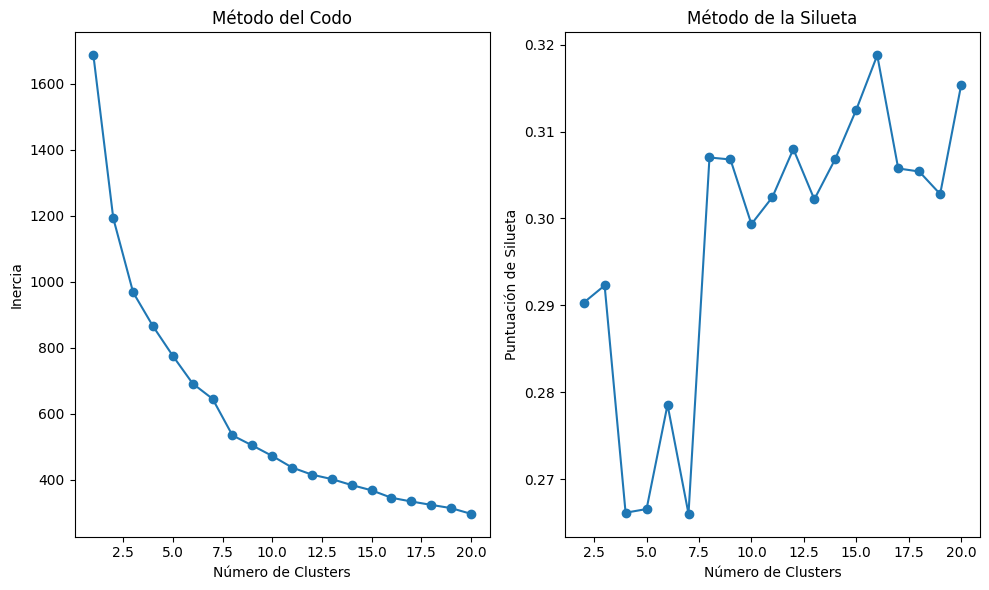

In [24]:
bt.encontrar_n_clusters(X)

### Ejercicio 7: Obtención de K, Score de Silueta

Comprueba el ajuste de k obteniendo el k que maximiza el score de silueta y pinta un gráfico de la evolución de dicho score con k. Usa los valores de k que hayas probado en el ejercicio anterior.

In [25]:

# rango de valores de k (de 0 a 20)
k_values = range(1, 20)

# variables para almacenar el mejor valor de k y la puntuación de silueta correspondiente
best_k = 0
best_silhouette_score = -1

# Iterar sobre los valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    #print(len(kmeans.labels_))
       

In [26]:
# Calculo la puntuación de silueta para X
silueta_point = silhouette_score(X, kmeans.labels_)
    
# Actualizo el mejor valor de k si se encuentra una puntuación de silueta mejor
if silueta_point > best_silhouette_score:
    best_k = k
    best_silhouette_score = silueta_point
# gana el est_silhouette_score por decimas
print("The best k:", best_k)
print("silueta_point:", best_silhouette_score)



The best k: 19
silueta_point: 0.3028060738842776


In [27]:
def plot_silueta_score_con_K(df, max_k):
    # almacenar los valores
    silhouette_scores = []

    # Rango de valores de k que deseas probar
    k_values = range(2, max_k + 1)

    # Iterar sobre diferentes valores de k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        find_labels_clusters = kmeans.fit_predict(df)
        
        # Calcular la puntuación de silueta para el clustering actual
        silueta_point = silhouette_score(df, find_labels_clusters)
        silhouette_scores.append(silueta_point)

    # Trazar el gráfico de la evolución del score de la silueta
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Puntuación de Silueta')
    plt.title('Evolución del "Score de Silueta" para Diferentes Valores de k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show();


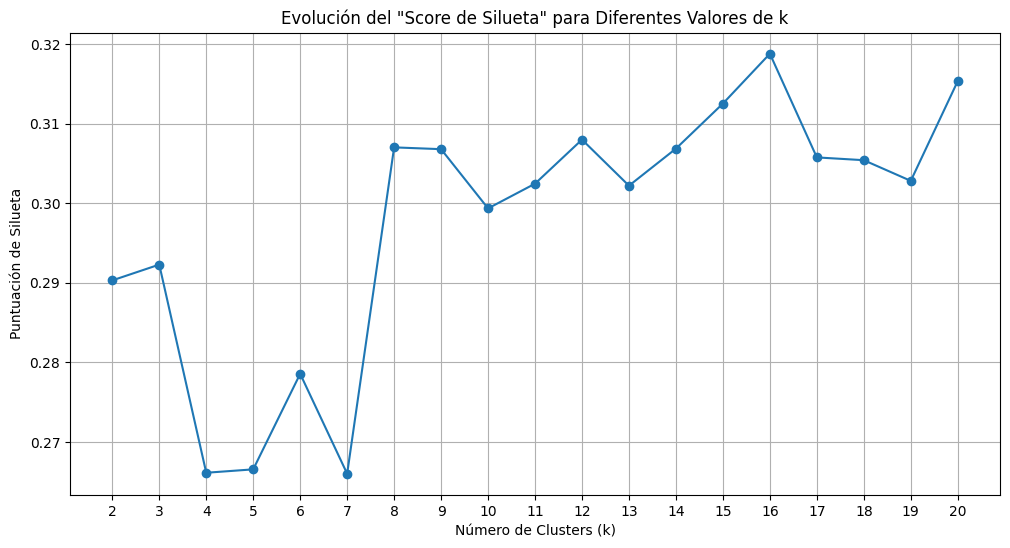

In [28]:
plot_silueta_score_con_K(X, max_k=20)

Me dice que 19 y que esta justo en el limite entre 2 cluster, por su cercania al 0

### Ejercicio 8: Obtención de K, diagrama de silueta

Para completar el estudio de k, muestra el diagramde silueta para k=2,3,4,5 y decide con este datos y los anteriores el valor de k a probar. NOTA: En la realidad, podríamos probar perfectamente k=2 y k=3 y luego que "Negocio" decidiera cuál le es más útil, aquí lo completamos por practicar todo lo aprendido

In [29]:
kmeans_per_k = [KMeans(n_clusters=k, random_state= 42, n_init = 25).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [51]:
inertias

[1686.9269466025282,
 1193.1327468951877,
 965.4183550492476,
 836.0931500688702,
 726.913538973446,
 652.2086441225103,
 581.5032019750616,
 535.0329719383136,
 499.52464194087787,
 467.08573736001154,
 437.7210215558105,
 414.35689431267,
 391.5365970010619,
 373.22577774475724,
 355.6747216675531,
 344.09326959660166,
 329.4046140945036,
 316.04465682903384,
 305.56023011760925]

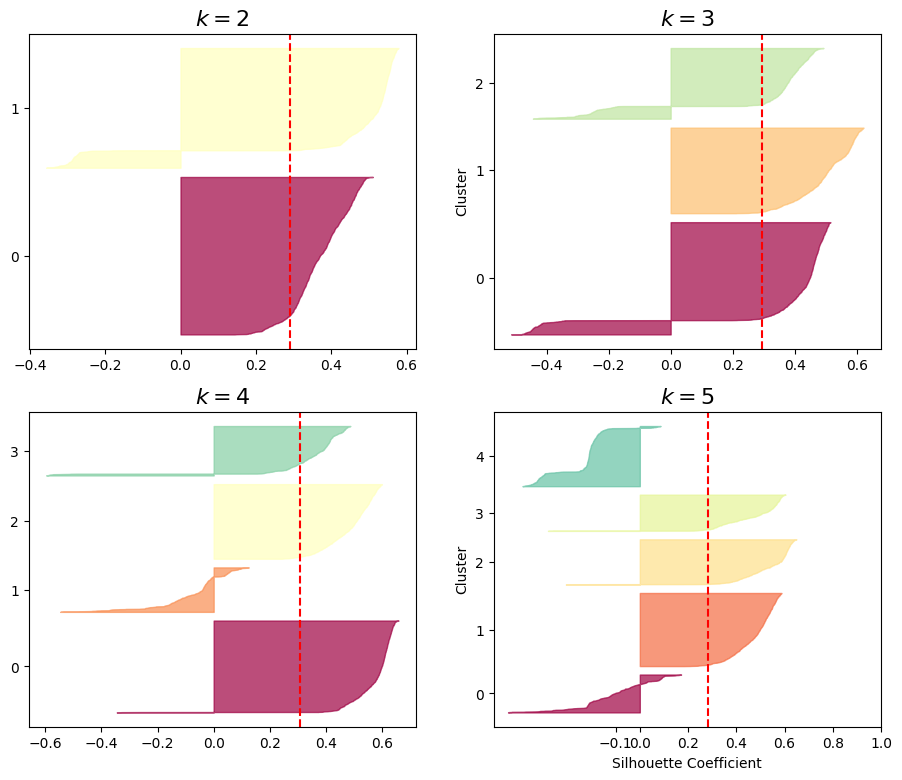

In [57]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show();

creo que el mejor es k=2 ya que guardan saimnilutd los clusteres y toidos estan por encima de la media

### Ejercico 9:

En general, una diferencia entre el proceso de construcción de un modelo no supervisado y un supervisado es que el ajuste de algunos hiperparámetros (como el número de clústeres) es anterior a la construcción del modelo. Por eso, construye un K-means para el valor (o valores) de K escogidos.

In [58]:
kmeans= KMeans(n_clusters=2, random_state=42)
# encuentro los cnetroides
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [59]:
# consigo las etiquetas de los centroides
kmeans.predict(X)

# obtengo las distancias a los centroides
kmeans.transform(X)

array([[2.2915486 , 0.8885297 ],
       [2.24326375, 1.05853089],
       [2.21419957, 0.82437623],
       ...,
       [0.83138212, 1.94493403],
       [1.60840879, 0.99576176],
       [0.63024783, 1.87446639]])

In [60]:
kmeans.cluster_centers_

array([[2.69659710e-01, 4.30016181e-01, 5.05764563e-01, 9.11104369e-01,
        2.88482371e-01, 3.99680289e-15],
       [2.90881225e-01, 7.53005305e-01, 3.78668419e-01, 2.41677617e-01,
        2.80923377e-01, 1.50197109e+00]])

### Ejercicio 10

Vamos a comprobar resultados, analizando los valores medios y distribución de cada uno de los clústeres para el k óptimo. Si tuvieras más de un posible valor de k a probar, analiza aquí el de mayor score de silueta. Y utiliza el siguiente ejercicio para el otro. Además de hacer un describe de las features por clúster, pinta estos con un pairplot considerando sideEffects y rating como x e y (o viceversa) y el clúster como hue (color). Compara el resultado con los clústeres sugeridos en el ejercicio 5.

In [61]:
kmeans_per_2=KMeans(n_clusters=2, random_state=42)
# encuentro los centroides
kmeans_per_2.fit(X)

KMeans(n_clusters=2, random_state=42)

In [62]:
# para hacer el describe, debo poner las etiquetas de los clusteres como si fuera una columna, con predict, consigigo las etiquetas de los clusteres 
X["clusters"]=kmeans_per_2.predict(X)

In [63]:
X

,urlDrugName,rating,effectiveness,sideEffects,condition,clusters
0,0.000000,0.333333,0.00,0.00,0.000000,1
1,0.001996,0.000000,0.00,0.25,0.000702,1
2,0.003992,1.000000,0.00,0.50,0.001404,1
3,0.005988,0.222222,0.25,0.00,0.002105,1
4,0.007984,0.111111,0.25,0.25,0.002807,1
...,...,...,...,...,...,...
3102,0.011976,1.000000,0.00,0.00,0.018947,1
3103,0.189621,0.000000,0.50,0.75,0.004912,0
3104,0.369261,0.111111,0.25,1.00,1.000000,0
3105,1.000000,0.777778,0.75,0.00,0.081404,1


In [79]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
urlDrugName,3107.0,0.285253,0.235205,0.0,0.097804,0.219561,0.429142,1.0
rating,3107.0,0.667346,0.326398,0.0,0.444444,0.777778,0.888889,1.0
effectiveness,3107.0,0.412375,0.393967,0.0,0.000000,0.500000,0.750000,1.0
sideEffects,3107.0,0.419215,0.368588,0.0,0.000000,0.500000,0.750000,1.0
condition,3107.0,0.282928,0.300324,0.0,0.027719,0.150175,0.489474,1.0
clusters,3107.0,0.734792,0.441515,0.0,0.000000,1.000000,1.000000,1.0


In [65]:
X.clusters.value_counts()/len(X)*100

clusters
1    73.47924
0    26.52076
Name: count, dtype: float64

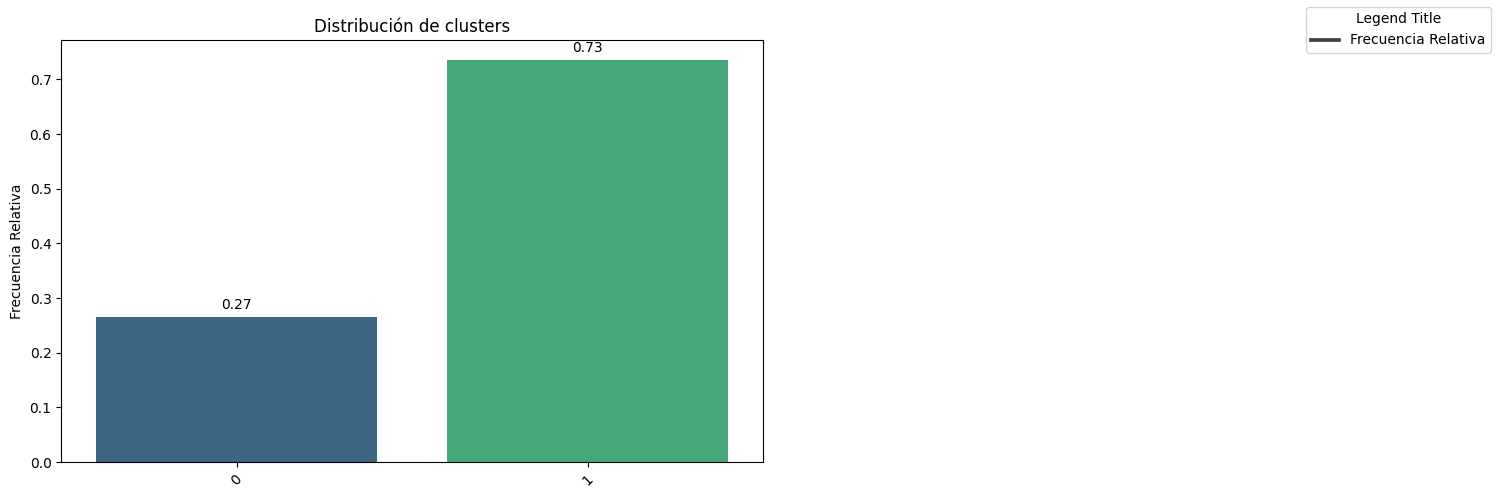

In [74]:
# muy discompensado 
bt.pinta_distribucion_numericas(df=X, columnas_numericas=["clusters"], relativa=True, mostrar_valores=True);

In [90]:
X.groupby(["clusters"]).describe().T

clusters                      0            1
urlDrugName   count  824.000000  2283.000000
              mean     0.269660     0.290881
              std      0.226265     0.238147
              min      0.001996     0.000000
              25%      0.083832     0.103792
              50%      0.197605     0.221557
              75%      0.392216     0.433134
              max      0.992016     1.000000
rating        count  824.000000  2283.000000
              mean     0.430016     0.753005
              std      0.312333     0.286606
              min      0.000000     0.000000
              25%      0.111111     0.666667
              50%      0.444444     0.888889
              75%      0.666667     1.000000
              max      0.888889     1.000000
effectiveness count  824.000000  2283.000000
              mean     0.505765     0.378668
              std      0.363567     0.399121
              min      0.000000     0.000000
              25%      0.000000     0.000000
              50%      0.500000     0.250000
              75%      0.750000     0.750000
              max      1.000000     1.000000
sideEffects   count  824.000000  2283.000000
              mean     0.911104     0.241678
              std      0.153635     0.239793
              min      0.500000     0.000000
              25%      0.750000     0.000000
              50%      1.000000     0.250000
              75%      1.000000     0.500000
              max      1.000000     1.000000
condition     count  824.000000  2283.000000
              mean     0.288482     0.280923
              std      0.299422     0.300689
              min      0.002105     0.000000
              25%      0.030175     0.024211
              50%      0.161404     0.147368
              75%      0.492982     0.488421
              max      1.000000     0.999298

hay mucho mas valores que tornan al 1 que el 0, por lo que parece que es mas efectivos los mediacamentos en el 1 que en el 0

In [91]:
X.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'clusters'],
      dtype='object')

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


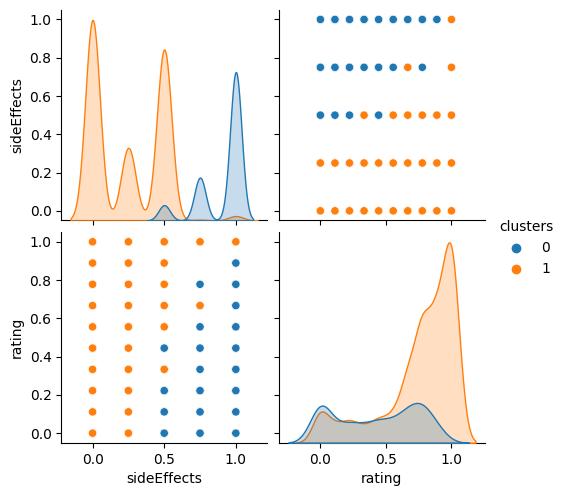

In [112]:
sns.pairplot(data=X[['sideEffects', 'rating', 'clusters' ]], hue="clusters");

### Ejercicio 11, EXTRA: Más valores de K

Repite el análisis del ejercicio 10 para un K diferente pero que consideres que tiene sentido aplicar.